# Part II - Ford Go Bike System Data
## by RATOVONIAINA Tsilavo Fitiavana

## Investigation Overview


In this ivestigation, we are focused on the frequency of rides per days and the longest rides characteristics.
 


## Dataset Overview

This analysis explores dataset containing informations about solo rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

### Preliminary Wrangling :

In [3]:
# Let's change the types of the date time columns and extract the day, hour and month for further analysis
def change_datatype_format(df,col):
    df[col]=pd.to_datetime(df[col])
    df[f"{col}_hour"]=df[col].dt.hour
    df[f"{col}_day"]=df[col].dt.day_name()
    #df[f"{col}_month"]=df[col].dt.month_name()
    
for col in ["start_time","end_time"] :
    change_datatype_format(df,col)

# For better use of the member birth year, it is needed to create a column age of member
df['member_age']=2019 - df['member_birth_year'] # the survey was done in 2019 

# We can't do anything with the missing values on start columns and member information, and they may affect the analysis so let's drop them
df.dropna(inplace=True)

## Frequency of rides per day

Most of the rides are taken on thursday.

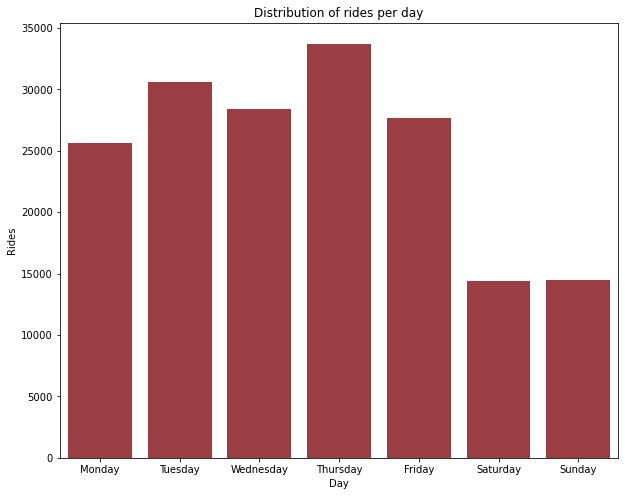

In [4]:
color = [171/255, 46/255, 53/255]
days=['Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday' , 'Sunday']

plt.figure(figsize=(10,8))
sns.countplot(data=df,x="start_time_day",color=color,order=days);
plt.title(f"Distribution of rides per day");
plt.xlabel(f"Day");
plt.ylabel("Rides");
plt.show();

## Longest ride by user type

Customer ride longer than subscriber.

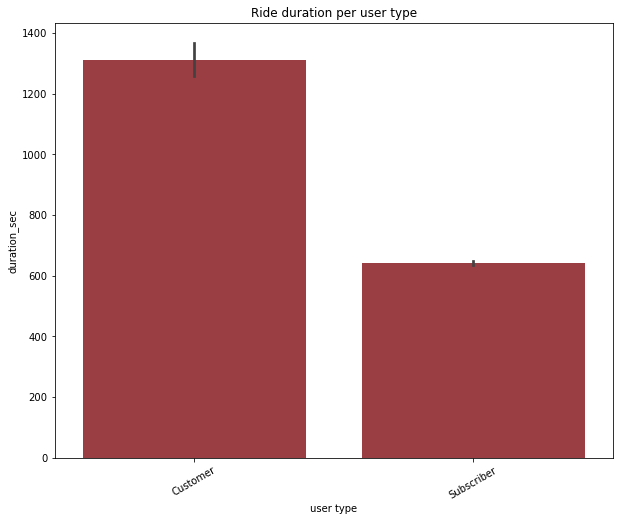

In [5]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x="user_type",y="duration_sec", color=color);
plt.xticks(rotation=30);
plt.title(f"Ride duration per user type");
plt.xlabel(f"user type");
plt.ylabel("duration_sec");

## Most stable ride duration

Male subscriber have a stable ride duration in any hour and day

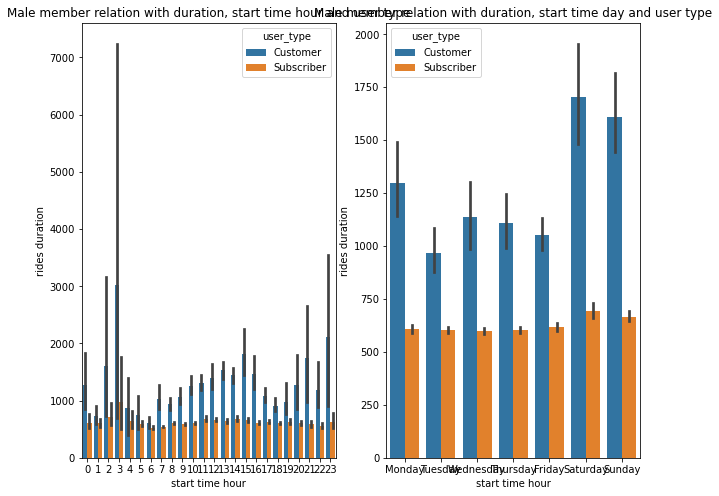

In [8]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1);
sns.barplot(data = df[df.member_gender=="Male"], x = "start_time_hour", y = 'duration_sec', hue = 'user_type',hue_order=["Customer","Subscriber"]);
plt.title(f"Male member relation with duration, start time hour and user type");
plt.ylabel("rides duration");
plt.xlabel("start time hour");

plt.subplot(1,2,2);
sns.barplot(data = df[df.member_gender=="Male"], x = "start_time_day", y = 'duration_sec', hue = 'user_type',hue_order=["Customer","Subscriber"],order=days);
plt.title(f"Male member relation with duration, start time day and user type");
plt.ylabel("rides duration");
plt.xlabel("start time hour");

In [9]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 646503 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\User\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\User\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\User\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Us

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 